# Explore here

In [1]:
import pandas as pd
from pickle import load
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Cargamos los datos y separamos entre train y test. Son los mismos que en ejercicio anterior

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df

X = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

## Modelo ejercicio anterior

In [3]:
# Cargamos el modelo del ejercicio anterior para poder comparar

from pickle import load

# Cargar el modelo desde el archivo
loaded_model = load(open("/workspaces/machine-learning-randomforest-chematudela/models/tree_classifier_final.sav", "rb"))
loaded_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [4]:
y_pred_test = loaded_model.predict(X_test)
y_pred_train = loaded_model.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7857142857142857

In [5]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.819218,0.737589,0.798866,0.742857,0.732394,0.865337
Test,0.785714,0.697248,0.764646,0.703704,0.690909,0.838384
Diferencia,0.033504,0.040341,0.034219,0.039153,0.041485,0.026953


## primer random forest "a pelo"

In [6]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.4527730855855856, 0.9642857142857143, 'BMI <= 29.15\ngini = 0.449\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.17004504504504506, 0.8928571428571429, 'DiabetesPedigreeFunction <= 1.12\ngini = 0.186\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.3114090653153153, 0.9285714285714286, 'True  '),
 Text(0.08783783783783784, 0.8214285714285714, 'Age <= 27.5\ngini = 0.165\nsamples = 144\nvalue = [220, 22]\nclass = 0'),
 Text(0.018018018018018018, 0.75, 'BMI <= 22.75\ngini = 0.041\nsamples = 82\nvalue = [142, 3]\nclass = 0'),
 Text(0.009009009009009009, 0.6785714285714286, 'gini = 0.0\nsamples = 25\nvalue = [51, 0]\nclass = 0'),
 Text(0.02702702702702703, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.396\ngini = 0.062\nsamples = 57\nvalue = [91.0, 3.0]\nclass = 0'),
 Text(0.018018018018018018, 0.6071428571428571, 'gini = 0.0\nsamples = 34\nvalue = [54, 0]\nclass = 0'),
 Text(0.036036036036036036, 0.6071428571428571, 'DiabetesPedigreeFunction <= 0.405\ngini = 0

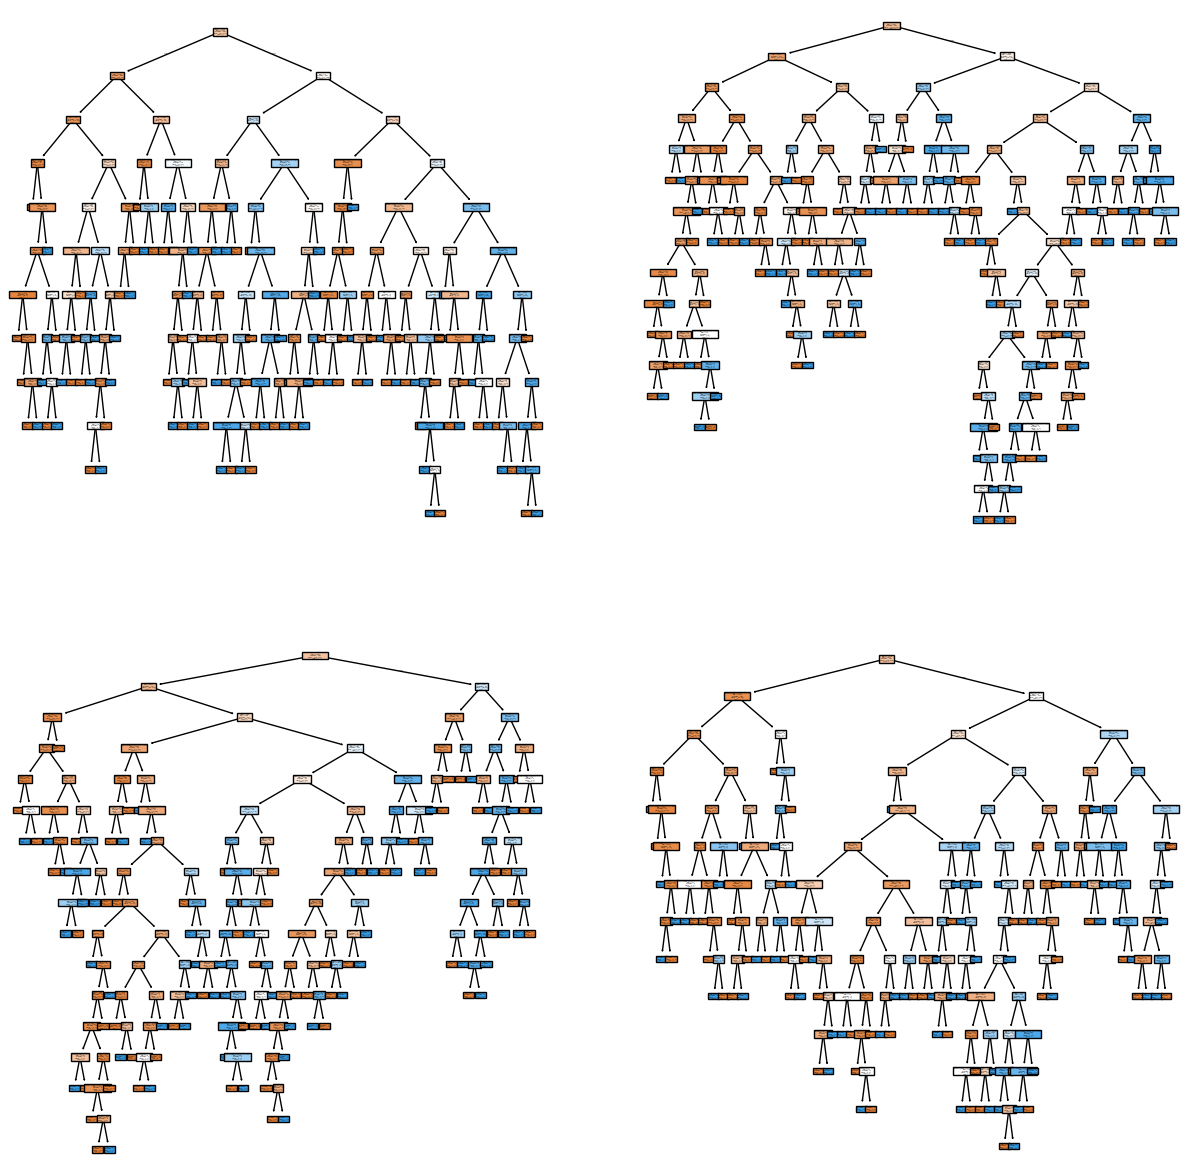

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7207792207792207

In [ ]:


y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)





def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

get_metrics(y_train, y_test, y_pred_train, y_pred_test)


,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
Test,0.720779,0.612613,0.69798,0.607143,0.618182,0.777778
Diferencia,0.279221,0.387387,0.30202,0.392857,0.381818,0.222222


Cabía esperar que el modelo iba a tener sobreajuste. vamos a "tocar variables" para intentar mejorarlo



## Segundo random forest metiendo algunas variables

In [10]:
model2 = RandomForestClassifier(criterion = 'entropy',max_depth=5, min_samples_split=10, random_state = 42)
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7727272727272727

In [12]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)





def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.850163,0.754011,0.806048,0.875776,0.661972,0.950125
Test,0.772727,0.666667,0.742424,0.700000,0.636364,0.848485
Diferencia,0.077436,0.087344,0.063624,0.175776,0.025608,0.101640


[Text(0.4375, 0.9166666666666666, 'BMI <= 29.15\nentropy = 0.925\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.16666666666666666, 0.75, 'DiabetesPedigreeFunction <= 0.163\nentropy = 0.482\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.3020833333333333, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'entropy = 0.0\nsamples = 22\nvalue = [42, 0]\nclass = 0'),
 Text(0.20833333333333334, 0.5833333333333334, 'Age <= 26.5\nentropy = 0.544\nsamples = 128\nvalue = [182, 26]\nclass = 0'),
 Text(0.125, 0.4166666666666667, 'Insulin <= 48.5\nentropy = 0.136\nsamples = 61\nvalue = [103, 2]\nclass = 0'),
 Text(0.08333333333333333, 0.25, 'Insulin <= 44.5\nentropy = 0.239\nsamples = 28\nvalue = [49, 2]\nclass = 0'),
 Text(0.041666666666666664, 0.08333333333333333, 'entropy = 0.141\nsamples = 27\nvalue = [49, 1]\nclass = 0'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.16666666666666666, 0.25, 'entropy = 0.0\ns

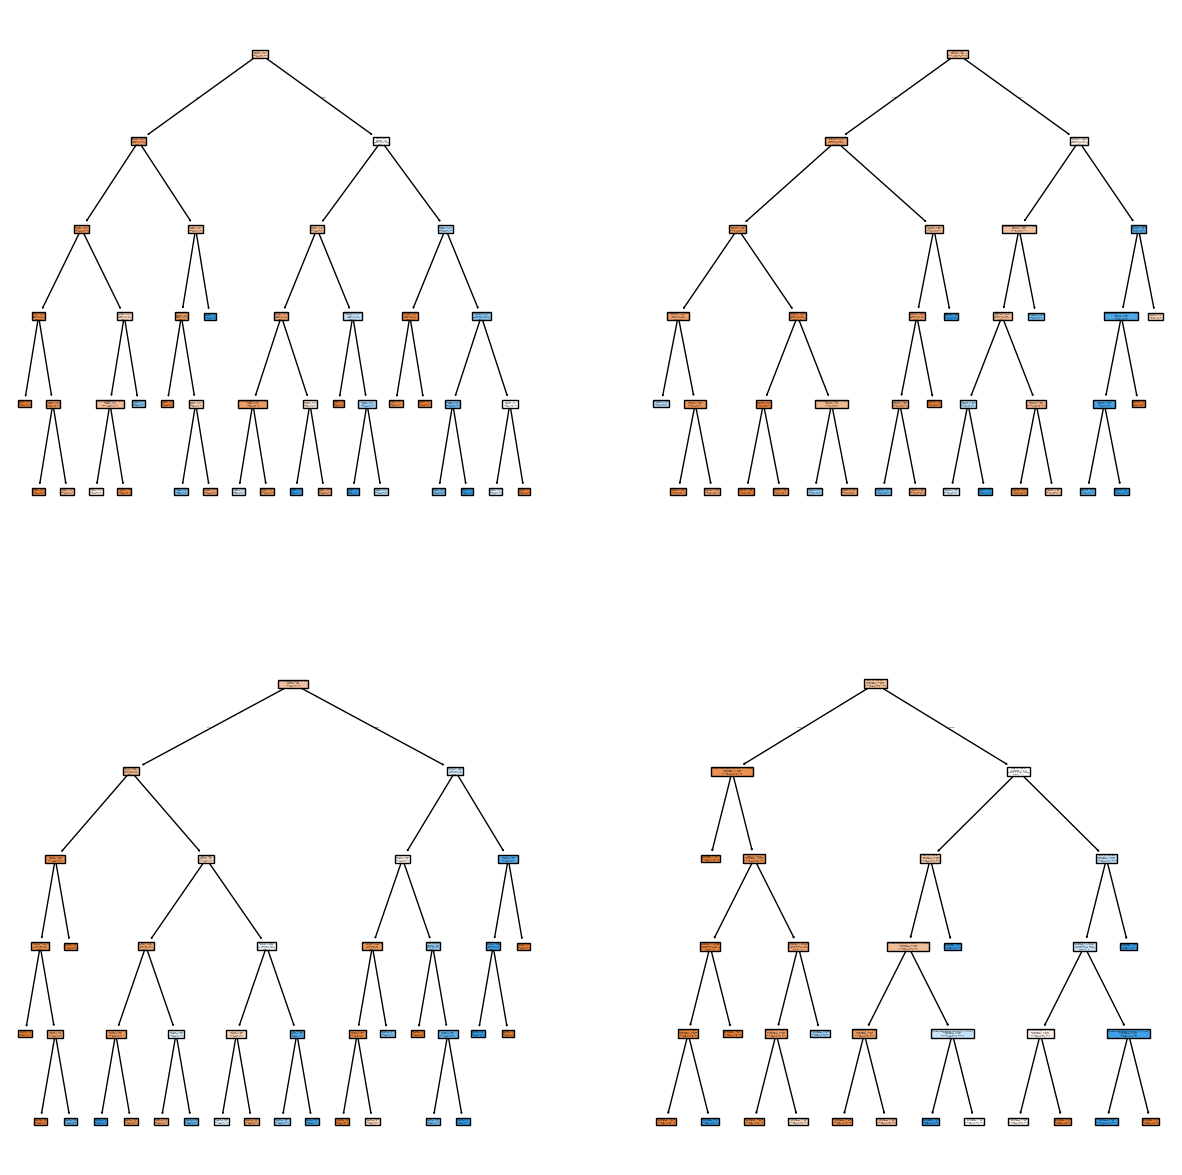

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

hemos mejorado el resultado pero sigue habiendo mucha diferencia entre test y train

## tercer random forest limitando la profundidad

In [14]:
model3 = RandomForestClassifier(criterion = 'entropy',max_depth=2, min_samples_split=10, random_state = 42)
model3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=10,
                       random_state=42)

In [15]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7792207792207793

In [16]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.775244,0.566038,0.692564,0.857143,0.422535,0.962594
Test,0.779221,0.622222,0.719192,0.800000,0.509091,0.929293
Diferencia,-0.003976,-0.056184,-0.026628,0.057143,-0.086556,0.033301


[Text(0.5, 0.8333333333333334, 'BMI <= 29.15\nentropy = 0.925\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.25, 0.5, 'DiabetesPedigreeFunction <= 0.163\nentropy = 0.482\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 22\nvalue = [42, 0]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.544\nsamples = 128\nvalue = [182, 26]\nclass = 0'),
 Text(0.75, 0.5, 'Age <= 28.5\nentropy = 1.0\nsamples = 233\nvalue = [181, 183]\nclass = 1'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.943\nsamples = 96\nvalue = [94, 53]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.971\nsamples = 137\nvalue = [87, 130]\nclass = 1')]

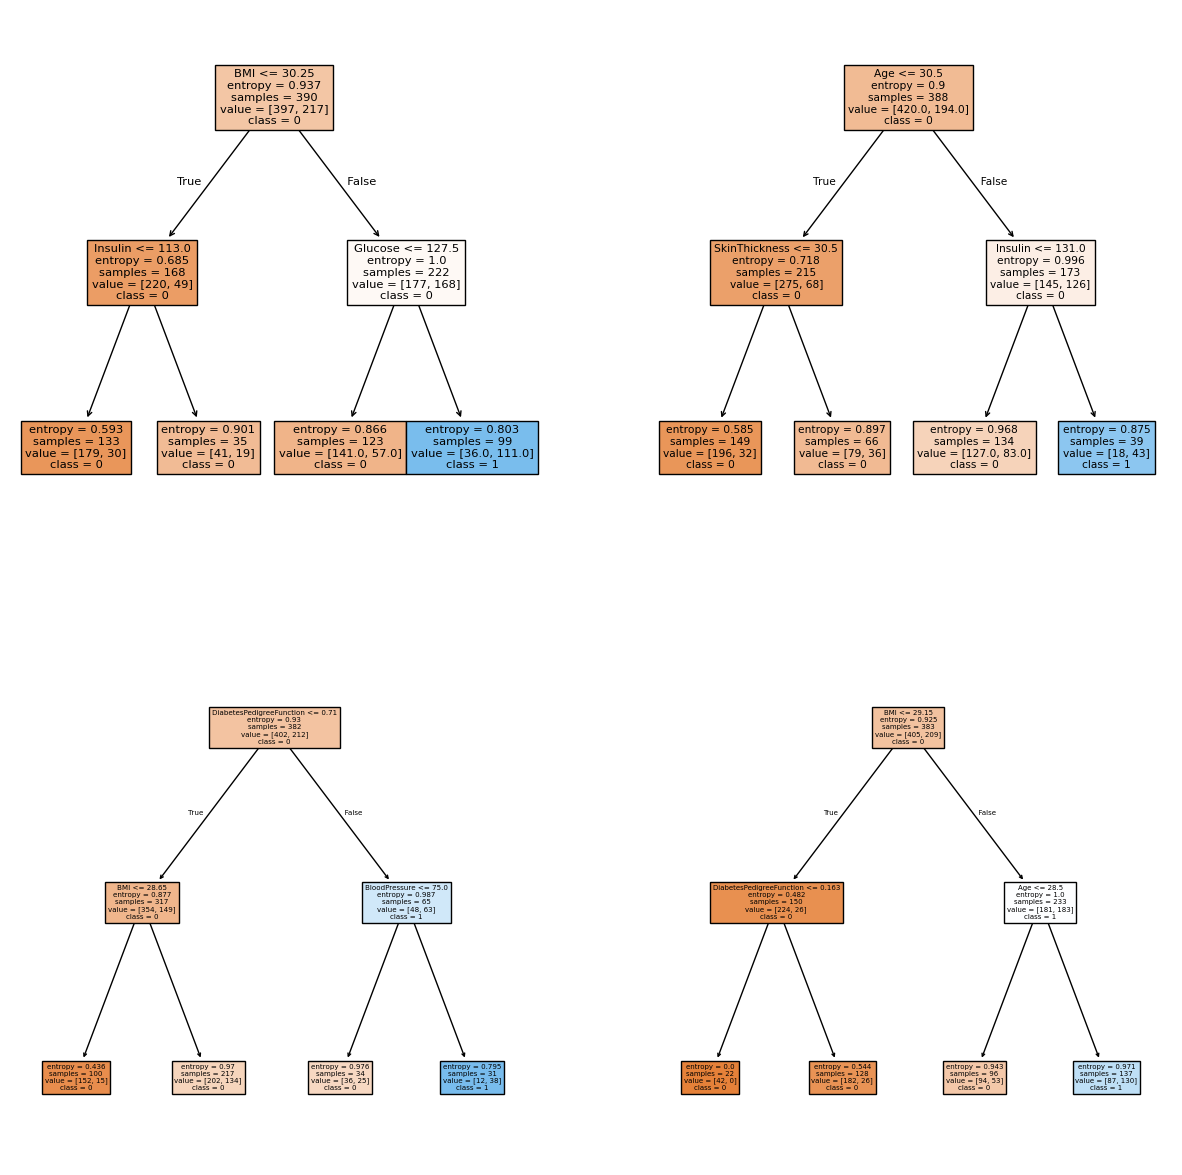

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model3.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model3.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model3.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model3.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

En este caso la cosa ha ido algo mejor. No llega a superar el de la práctica anterior pero está bastante bien. 

## 

## Uso de grid para la búsqueda de hyperparámetros más óptimos

In [35]:
#definimos los hyperparámetros que van a estar en juego en las distintas pruebas

hyperparams = {
    "max_features": ["sqrt", "log2",None],
    "max_depth": [3, 4, 5],
    "min_samples_split": [5, 10, 15],
    "bootstrap" :[True, False]
    
}

grid = GridSearchCV(model, hyperparams, scoring = 'accuracy', cv = 5)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [36]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [5, 10, 15]},
             scoring='accuracy')

In [37]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': None,
 'min_samples_split': 5}

## Última iteración de RandomForest

In [60]:
model4 = RandomForestClassifier(criterion = 'gini',max_depth=4, min_samples_split=5, max_features=None, bootstrap=True, random_state = 42)
model4.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=None, min_samples_split=5,
                       random_state=42)

In [61]:
y_pred_test = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7727272727272727

In [62]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.843648,0.752577,0.806563,0.834286,0.685446,0.927681
Test,0.772727,0.678899,0.750505,0.685185,0.672727,0.828283
Diferencia,0.070921,0.073678,0.056058,0.149101,0.012719,0.099398


Después de estar jugando con el modelo y cambiando hyperparámtros, creo que en este caso no se justificaría el uso de Random Forest puesto que decissiontree sería más que suficiente.